# Acceptance rate scheme matches target rate

## ODE model

Let's start with an ODE model of a conversion reaction:

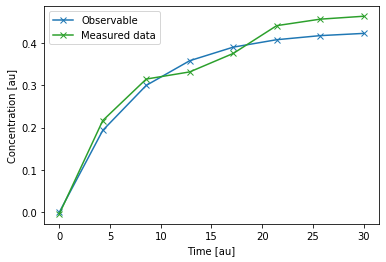

In [38]:
import pyabc
from study_abc_noise.model import \
    ConversionReactionModelVars as ModelVars
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import logging
%matplotlib inline

# for debugging
df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Acceptor')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Epsilon')
df_logger.setLevel(logging.DEBUG)

# model
mv = ModelVars(n_t=8)

# data
data = mv.get_model_noisy()(mv.p_true)

# plot it
mv.viz_data_and_sim(data)

In [2]:
print(mv.p_true)

{'p0': 0.06, 'p1': 0.08}


Now let's run it:

In [3]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=pyabc.AcceptanceRateScheme(),
    schemes=[pyabc.AcceptanceRateScheme()],
    enforce_exact_final_temperature=False)

for pop_size in [100, 1000]:
    # define the analysis
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=temperature,
        acceptor=acceptor,
        population_size=pop_size)
    history_ode = abc.new("sqlite:///h_cr.db", data)
    history_ode = abc.run(max_nr_populations=6)

INFO:History:Start <ABCSMC(id=1, start_time=2019-11-25 10:14:42.455104, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=8.8709e+00 for t=0.
INFO:ABC:t: 0, eps: 151.15539124146062.
DEBUG:Acceptor:Encountered pd=1.1585e+01 > c=8.8709e+00, thus weight=1.0181e+00.
DEBUG:Acceptor:Encountered pd=1.4251e+01 > c=8.8709e+00, thus weight=1.0362e+00.
DEBUG:Acceptor:Encountered pd=1.4211e+01 > c=8.8709e+00, thus weight=1.0360e+00.
DEBUG:Acceptor:Encountered pd=2.0688e+01 > c=8.8709e+00, thus weight=1.0813e+00.
DEBUG:Acceptor:Encountered pd=1.5734e+01 > c=8.8709e+00, thus weight=1.0464e+00.
INFO:ABC:Acceptance rate: 100 / 390 = 2.5641e-01, ESS=9.9989e+01.
DEBUG:Acceptor:pdf_norm=2.0688e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures: [40.327424929757505].
INFO:ABC:t: 1, eps: 40.327424929757505.
DEBUG:Acceptor:Encountered pd=2.1697e+01 > c=2.0688e+01, thus weight=1.0253e+00.
DEBUG:Acceptor:Encountered pd=2.1850e+01 > c=2.0688e+01, thus weight=1.0292e+00.
DEBUG:Accept

Some visualizations:

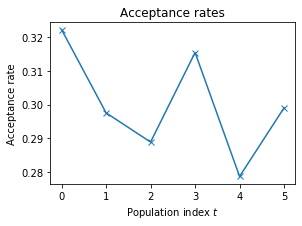

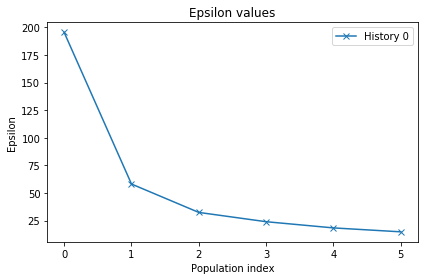

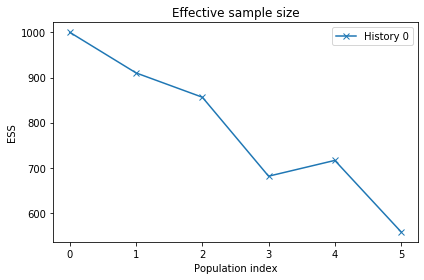

In [4]:
pyabc.visualization.plot_acceptance_rates_trajectory(history_ode)

plt.gcf().set_size_inches((4, 3))
plt.gca().get_legend().remove()
plt.savefig("acc_rate.svg", format='svg')
pyabc.visualization.plot_epsilons(history_ode)
pyabc.visualization.plot_effective_sample_sizes(history_ode)

## MJP model

Next, let's go for an MJP model of gene expression:

In [ ]:
pyabc.visualization.plot_acceptance_rates_trajectory(history_mjp)
pyabc.visualization.plot_epsilons(history_mjp, scale="log10")
pyabc.visualization.plot_effective_sample_sizes(history_mjp)

## MJP model with Poisson noise

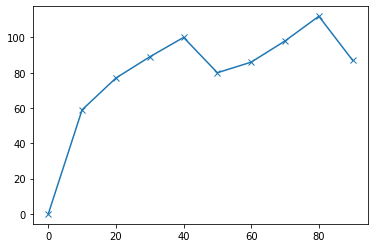

In [20]:
import pyabc
from study_abc_noise.model import MRNATranscriptionModelVars as ModelVars
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import logging
%matplotlib inline

# model
mv = ModelVars(n_t=10, noise_model='poisson')

# data
data = mv.get_model_noisy()(mv.p_true)

# plot
plt.plot(data['t'], data['mrna'], 'x-')

In [21]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=pyabc.AcceptanceRateScheme(),
    schemes=[pyabc.AcceptanceRateScheme()],
    enforce_exact_final_temperature=False)

# define the analysis
for pop_size in [100, 1000]:
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=temperature,
        acceptor=acceptor,
        population_size=pop_size)
    history_mjp = abc.new("sqlite:///h_mrna_poisson.db", data)
    history_mjp = abc.run(max_nr_populations=6)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-23 10:11:36.455847, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=-3.5854e+01 for t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [118.59544102746364].
INFO:ABC:t: 0, eps: 118.59544102746364.
DEBUG:Acceptor:Encountered pd=-3.4404e+01 > c=-3.5854e+01, thus weight=1.0123e+00.
DEBUG:Acceptor:Encountered pd=-3.4706e+01 > c=-3.5854e+01, thus weight=1.0097e+00.
DEBUG:Acceptor:Encountered pd=-3.3646e+01 > c=-3.5854e+01, thus weight=1.0188e+00.
DEBUG:Acceptor:Encountered pd=-3.4068e+01 > c=-3.5854e+01, thus weight=1.0152e+00.
DEBUG:Acceptor:Encountered pd=-3.5697e+01 > c=-3.5854e+01, thus weight=1.0013e+00.
DEBUG:Acceptor:Encountered pd=-3.4440e+01 > c=-3.5854e+01, thus weight=1.0120e+00.
DEBUG:Acceptor:Encountered pd=-3.5614e+01 > c=-3.5854e+01, thus weight=1.0020e+00.
DEBUG:Acceptor:Encountered pd=-3.5279e+01 > c=-3.5854e+01, thus weight=1.0049e+00.
DEBUG:Acceptor:Encountered pd=-3.5799e+01 > c=-3.5854e+01,

## SDE model

Next, we consider an SDE model of ion channel activation:

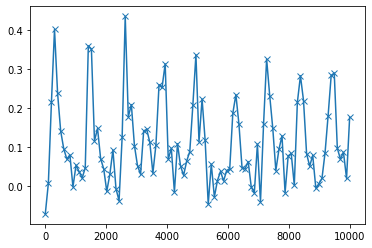

In [1]:
import pyabc
from study_abc_noise.model import HodgkinHuxleyModelVars as ModelVars
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import logging
%matplotlib inline

# for debugging
df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Acceptor')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Epsilon')
df_logger.setLevel(logging.DEBUG)

# model
mv = ModelVars(n_t=100)

# data
data = mv.get_model_noisy()(mv.p_true)

plt.plot(data['K'], 'x-')

In [2]:
print(mv.p_true)

{'dc': 20, 'membrane_dim': 10}


In [4]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=pyabc.AcceptanceRateScheme(),
    schemes=[pyabc.AcceptanceRateScheme()],
    enforce_exact_final_temperature=False)

# define the analysis
for pop_size in [100, 1000]:
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=temperature,
        acceptor=acceptor,
        population_size=pop_size)
    history_sde = abc.new("sqlite:///h_hh.db", data)
    history_sde = abc.run(max_nr_populations=6)

INFO:History:Start <ABCSMC(id=1, start_time=2019-11-25 10:41:40.264433, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=1.5231e+02 for t=0.
INFO:ABC:t: 0, eps: 205.9692817994543.
DEBUG:Acceptor:Encountered pd=1.5497e+02 > c=1.5231e+02, thus weight=1.0130e+00.
DEBUG:Acceptor:Encountered pd=1.5238e+02 > c=1.5231e+02, thus weight=1.0003e+00.
INFO:ABC:Acceptance rate: 100 / 315 = 3.1746e-01, ESS=1.0000e+02.
DEBUG:Acceptor:pdf_norm=1.5497e+02 for t=1.
DEBUG:Epsilon:Proposed temperatures: [156.35345166769503].
INFO:ABC:t: 1, eps: 156.35345166769503.
DEBUG:Acceptor:Encountered pd=1.5558e+02 > c=1.5497e+02, thus weight=1.0039e+00.
DEBUG:Acceptor:Encountered pd=1.5503e+02 > c=1.5497e+02, thus weight=1.0004e+00.
DEBUG:Acceptor:Encountered pd=1.5549e+02 > c=1.5497e+02, thus weight=1.0033e+00.
DEBUG:Acceptor:Encountered pd=1.5532e+02 > c=1.5497e+02, thus weight=1.0023e+00.
INFO:ABC:Acceptance rate: 100 / 366 = 2.7322e-01, ESS=7.4526e+01.
DEBUG:Acceptor:pdf_norm=1.55

  File "/home/yannik/pyabc/pyabc/model.py", line 121, in summary_statistics
    raw_data = self.sample(pars)
  File "/home/yannik/Documents/Project8_pyABC_Noise/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 116, in simulate
    stdout=subprocess.PIPE)
KeyboardInterrupt
  File "/home/yannik/pyabc/pyabc/model.py", line 270, in sample
    return self.sample_function(pars)
  File "/home/yannik/anaconda3/lib/python3.7/subprocess.py", line 474, in run
    stdout, stderr = process.communicate(input, timeout=timeout)
  File "/home/yannik/Documents/Project8_pyABC_Noise/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 55, in model
    val = simulate(**p, executable=self.executable)
  File "/home/yannik/anaconda3/lib/python3.7/subprocess.py", line 926, in communicate
    stdout = self.stdout.read()
KeyboardInterrupt
  File "/home/yannik/Documents/Project8_pyABC_Noise/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 116, in simulate
    stdout=subproces

KeyboardInterrupt: 

In [ ]:
pyabc.visualization.plot_acceptance_rates_trajectory(history_sde)
pyabc.visualization.plot_epsilons(history_sde)
pyabc.visualization.plot_effective_sample_sizes(history_sde)

# Plots

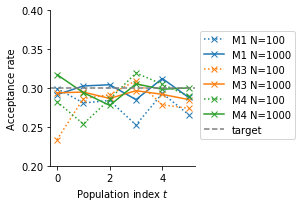

In [5]:
import pyabc
import matplotlib.pyplot as plt
%matplotlib inline

pop_sizes = [100, 1000]
h_cr_100 = pyabc.History("sqlite:///h_cr.db", _id=1)
h_cr_1000 = pyabc.History("sqlite:///h_cr.db", _id=2)
h_mrna_100 = pyabc.History("sqlite:///h_mrna_poisson.db", _id=1)
h_mrna_1000 = pyabc.History("sqlite:///h_mrna_poisson.db", _id=2)
h_hh_100 = pyabc.History("sqlite:///h_hh.db", _id=1)
h_hh_1000 = pyabc.History("sqlite:///h_hh.db", _id=2)

histories = [h_cr_100, h_cr_1000,
             h_hh_100,h_hh_1000,
             h_mrna_100,h_mrna_1000,]
labels = ["M1 N=100", "M1 N=1000", "M3 N=100", "M3 N=1000", "M4 N=100", "M4 N=1000"]
fig, ax = plt.subplots()
ax = pyabc.visualization.plot_acceptance_rates_trajectory(histories, labels, ax=ax)
lines = ax.get_lines()
for i in [0, 1, 2]:
    for j in [0, 1]:
        lines[i*2+j].set_color(f'C{i}')
    lines[i*2].set_linestyle('dotted')
ax.axhline(0.3, color='grey', linestyle='dashed', label='target')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim([0.2, 0.4])
ax.set_title(None)
fig.set_size_inches((3,3))
fig.tight_layout()
ax.legend(loc="upper left", bbox_to_anchor=(1, 0.9))
for fmt in ['svg', 'eps']:
    plt.savefig(f"acceptance_rate_schedule_works.{fmt}", format=fmt)